In [2]:
# Python 기본 라이브러리
import warnings
from PIL import Image

# PyTorch 및 딥러닝 관련 라이브러리
import torch
from lavis.processors import BlipImageEvalProcessor

# 사용자 정의 모듈
from models import CustomBlip2T5model,remove_module_prefix #커스텀파일

# 경고 무시
warnings.filterwarnings('ignore')

In [3]:
vis_processors = BlipImageEvalProcessor(image_size=560) # 이미지 전처리기 초기화
blipT5_model = CustomBlip2T5model(img_size=560) # BLIP2-T5 모델 초기화

best_state_dict = torch.load(f"output/model_best.pth", map_location='cpu')['model_state_dict'] # 학습된 모델 가중치 불러오기 
best_state_dict = remove_module_prefix(best_state_dict) # 모듈 접두사 제거
blipT5_model.load_state_dict(best_state_dict,strict=False) # 학습된 모델 가중치 적용
del best_state_dict # 메모리 효율을 위해 필요 없는 변수 삭제

vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 28.6MB/s]
tokenizer_config.json: 100%|██████████| 28.0/28.0 [00:00<00:00, 60.5kB/s]
config.json: 100%|██████████| 570/570 [00:00<00:00, 1.46MB/s]
100%|██████████| 1.89G/1.89G [01:05<00:00, 31.0MB/s] 


Position interpolate from 16x16 to 40x40


config.json: 100%|██████████| 625/625 [00:00<00:00, 1.67MB/s]
model.safetensors: 100%|██████████| 714M/714M [00:09<00:00, 72.4MB/s] 
tokenizer_config.json: 100%|██████████| 2.54k/2.54k [00:00<00:00, 5.09MB/s]
spiece.model: 100%|██████████| 792k/792k [00:00<00:00, 42.2MB/s]
tokenizer.json: 100%|██████████| 2.42M/2.42M [00:00<00:00, 44.8MB/s]
special_tokens_map.json: 100%|██████████| 2.20k/2.20k [00:00<00:00, 5.58MB/s]
config.json: 100%|██████████| 1.44k/1.44k [00:00<00:00, 3.10MB/s]
model.safetensors.index.json: 100%|██████████| 53.0k/53.0k [00:00<00:00, 275kB/s]
model-00001-of-00002.safetensors: 100%|██████████| 9.45G/9.45G [02:28<00:00, 63.5MB/s]
model-00002-of-00002.safetensors: 100%|██████████| 1.95G/1.95G [00:27<00:00, 71.9MB/s]
generation_config.json: 100%|██████████| 147/147 [00:00<00:00, 405kB/s]
tokenizer_config.json: 100%|██████████| 2.35k/2.35k [00:00<00:00, 4.10MB/s]
tokenizer.json: 100%|██████████| 2.92M/2.92M [00:00<00:00, 2.97MB/s]
special_tokens_map.json: 100%|██████████

In [4]:
# 모델을 GPU로 이동
device = 'cuda' 
blipT5_model.to(device) 

# VQA(Visual Question Answering) 테스트 함수
def perform_visual_qa(image_path, question): 
    # 이미지 불러오기 및 크기 조정
    image = Image.open(image_path)
    image = image.resize((700,500))
    display(image) 
    # 이미지 전처리 및 모델 입력 형태로 변환
    image = vis_processors(image).unsqueeze(0).to(device) 
    
    # 모델을 이용한 답변 생성
    with torch.autocast(device_type="cuda"):
        output = blipT5_model.generate({"image": image, "prompt": question}) 
    print('질문 :', question) 
    print('답변 :', output[0])

In [10]:
# 테스트 이미지 경로 및 질문
image_path = 'sample_data/1010110440120230809114211.jpg' 
question = '사진에 대해서 구체적으로 서술해주세요.'

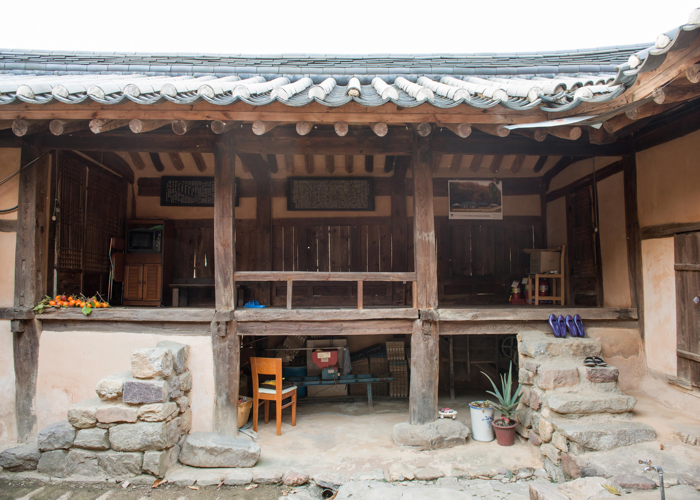

질문 : 사진에 대해서 구체적으로 서술해주세요.
답변 : 사진 속 건물은 한옥이고, 한옥 옆에는 마당이 있습니다.


In [11]:
# VQA 테스트 실행
perform_visual_qa(image_path, question)